_Importing Required Libraries_

In [1]:
pip install hampel

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\pdfstructure-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
import tensorflow as tf
from hampel import hampel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from matplotlib import pyplot
from numpy import array
import matplotlib.pyplot as plt

### generating vanderpol oscillator data (position and velocity) using range kutta method

In [12]:
from data_gen.data_gen.vander_poll import rk4


In [15]:
def vanderpol(x, y, mu):
  return (y, mu*(1-x**2)*y - x)

mu = 4  # Parameter for nonlinearity
t_start = 0  # Starting time
t_end = 70  # End time
dt = 0.04  # Time step 
x0 = 1  # Initial position
y0 = 0  # Initial velocity

# Initialize lists for storing data
t = []
x = []
y = []

# Simulate using RK4
t.append(t_start)
x.append(x0)
y.append(y0)

for i in range(int((t_end - t_start) / dt)):
  next_point = rk4(vanderpol, x[-1], y[-1], dt, mu)
  t.append(t[-1] + dt)
  x.append(next_point[0])
  y.append(next_point[1])

print("Time:", t)
print("x:", x)
print("dx/dt:", y)

with open(r'.\Dataset\van_der_pol_intermittency.dat', "wb") as file:
    # Your code for writing to the file goes here
  for i in range(len(t)):
    velocity_bytes = str(y[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(x[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)

Time: [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24000000000000002, 0.28, 0.32, 0.36, 0.39999999999999997, 0.43999999999999995, 0.4799999999999999, 0.5199999999999999, 0.5599999999999999, 0.6, 0.64, 0.68, 0.7200000000000001, 0.7600000000000001, 0.8000000000000002, 0.8400000000000002, 0.8800000000000002, 0.9200000000000003, 0.9600000000000003, 1.0000000000000002, 1.0400000000000003, 1.0800000000000003, 1.1200000000000003, 1.1600000000000004, 1.2000000000000004, 1.2400000000000004, 1.2800000000000005, 1.3200000000000005, 1.3600000000000005, 1.4000000000000006, 1.4400000000000006, 1.4800000000000006, 1.5200000000000007, 1.5600000000000007, 1.6000000000000008, 1.6400000000000008, 1.6800000000000008, 1.7200000000000009, 1.760000000000001, 1.800000000000001, 1.840000000000001, 1.880000000000001, 1.920000000000001, 1.960000000000001, 2.000000000000001, 2.040000000000001, 2.080000000000001, 2.120000000000001, 2.160000000000001, 2.200000000000001, 2.240000000000001, 2.280000000000001, 2.320000000000001

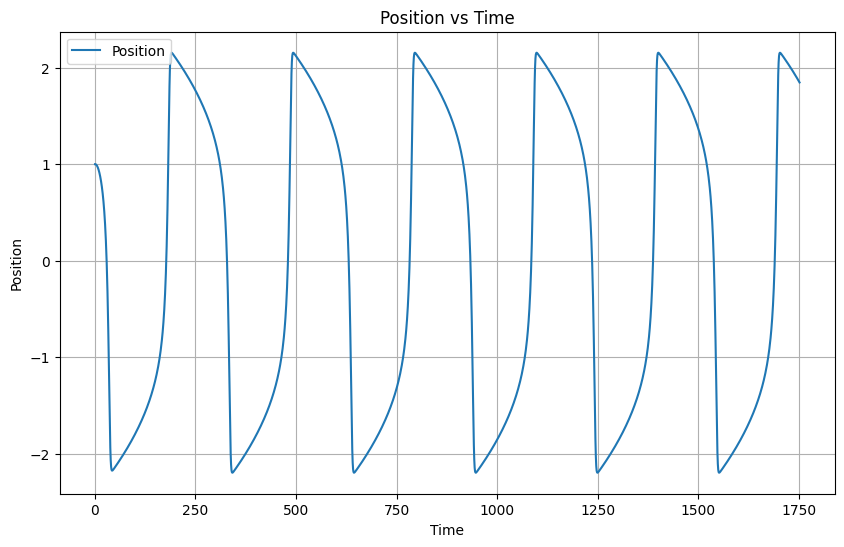

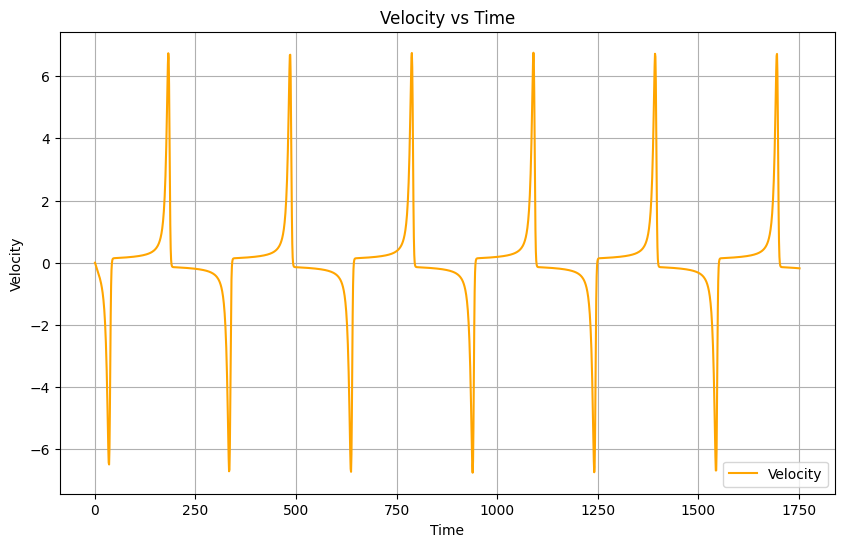

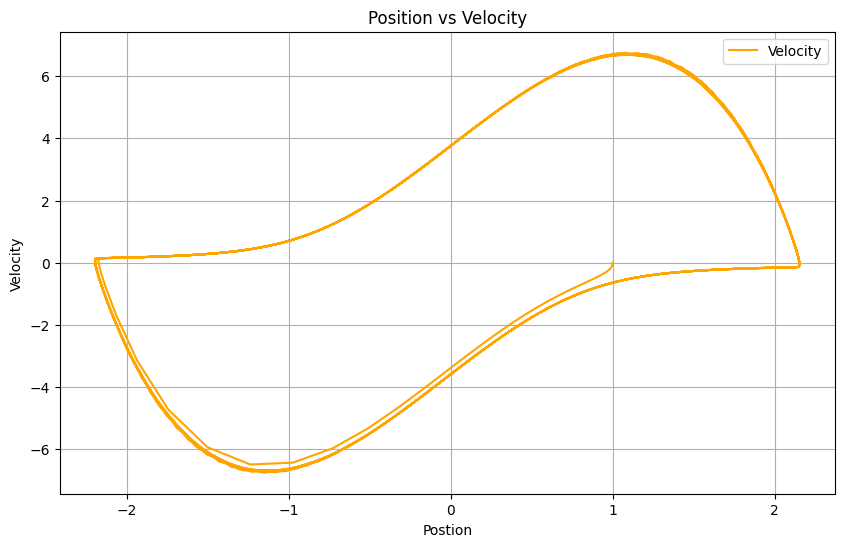

In [16]:
data = np.loadtxt(r'.\Dataset\van_der_pol_intermittency.dat')
# Extract columns from the data
time= np.arange(1,data.shape[0]+1)
velocity = data[:, 0]
position = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, position, label="Position")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time, velocity, label="Velocity", color="orange")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(position, velocity, label="Velocity", color="orange")
plt.xlabel("Postion")
plt.ylabel("Velocity")
plt.title("Position vs Velocity")
plt.legend()
plt.grid(True)
plt.show()


### generating shm data (position and velocity) using range kutta method

(a) For undamped SHM

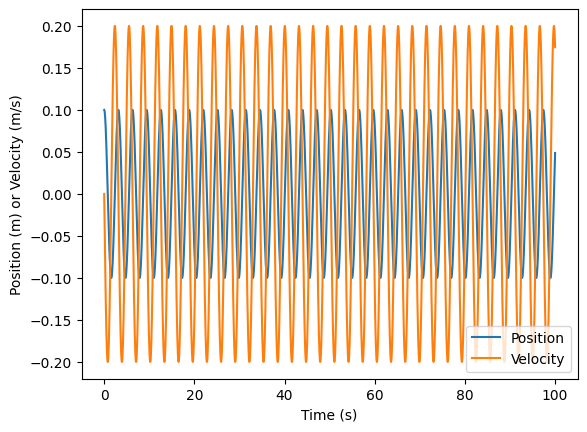

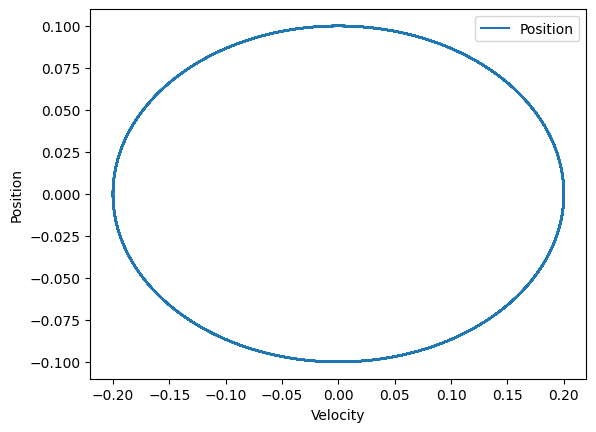

In [5]:
import numpy as np

def shm_rk4(mass, spring_constant, initial_position, initial_velocity, time_step, num_steps):

  omega = np.sqrt(spring_constant / mass)  # Angular frequency

  time = np.linspace(0, time_step * num_steps, num_steps + 1)
  position = np.zeros(num_steps + 1)
  velocity = np.zeros(num_steps + 1)

  position[0] = initial_position
  velocity[0] = initial_velocity

  for i in range(1, num_steps + 1):
    k1_p = velocity[i - 1]
    k1_v = -omega**2 * position[i - 1]

    k2_p = velocity[i - 1] + 0.5 * time_step * k1_v
    k2_v = -omega**2 * (position[i - 1] + 0.5 * time_step * k1_p)

    k3_p = velocity[i - 1] + 0.5 * time_step * k2_v
    k3_v = -omega**2 * (position[i - 1] + 0.5 * time_step * k2_p)

    k4_p = velocity[i - 1] + time_step * k3_v
    k4_v = -omega**2 * (position[i - 1] + time_step * k3_p)

    position[i] = position[i - 1] + time_step * (k1_p + 2 * k2_p + 2 * k3_p + k4_p) / 6
    velocity[i] = velocity[i - 1] + time_step * (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6

  return time, position, velocity

# Example usage
mass = 1.0  # kg
spring_constant = 4.0  # N/m
initial_position = 0.1  # m
initial_velocity = 0.0  # m/s
time_step = 0.01  # s
num_steps = 10000

time, position, velocity = shm_rk4(mass, spring_constant, initial_position, initial_velocity, time_step, num_steps)

import matplotlib.pyplot as plt

plt.plot(time, position, label="Position")
plt.plot(time, velocity, label="Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Position (m) or Velocity (m/s)")
plt.legend()
plt.show()

plt.plot(velocity, position, label="Position")
plt.xlabel("Velocity")
plt.ylabel("Position")
plt.legend()
plt.show()

with open(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\shm_data.dat', "wb") as file:
  for i in range(len(t)):
    # Convert velocity and position to bytes before writing
    velocity_bytes = str(velocity[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(position[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)


(b) For damped Simple Harmonic Oscillation

In [6]:
def shm(x, y, omega):
  return (y, - (omega**2)*x)

def rk4(f, x0, y0, dt, omega):

  k1 = f(x0, y0, omega)
  k2 = f(x0 + dt/2, y0 + dt/2 * k1[0], omega)
  k3 = f(x0 + dt/2, y0 + dt/2 * k2[0], omega)
  k4 = f(x0 + dt, y0 + dt * k3[0], omega)
  
  x_new = x0 + dt/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
  y_new = y0 + dt/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
  
  return [x_new, y_new]

# Define parameters
omega = 2*np.pi  # Angular frequency (can be adjusted)
t_start = 0  # Starting time
t_end = 70  # End time
dt = 0.01  # Time step
x0 = 1  # Initial position
y0 = 0  # Initial velocity (can be set to non-zero for initial momentum)

t = []
x = []
y = []

# Simulate using RK4
t.append(t_start)
x.append(x0)
y.append(y0)

for i in range(int((t_end - t_start) / dt)):
  next_point = rk4(shm, x[-1], y[-1], dt, omega)
  t.append(t[-1] + dt)
  x.append(next_point[0])
  y.append(next_point[1])

with open(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\shm_data_damped.dat', "wb") as file:

  for i in range(len(t)):
    # Convert velocity and position to bytes before writing
    velocity_bytes = str(y[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(x[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)


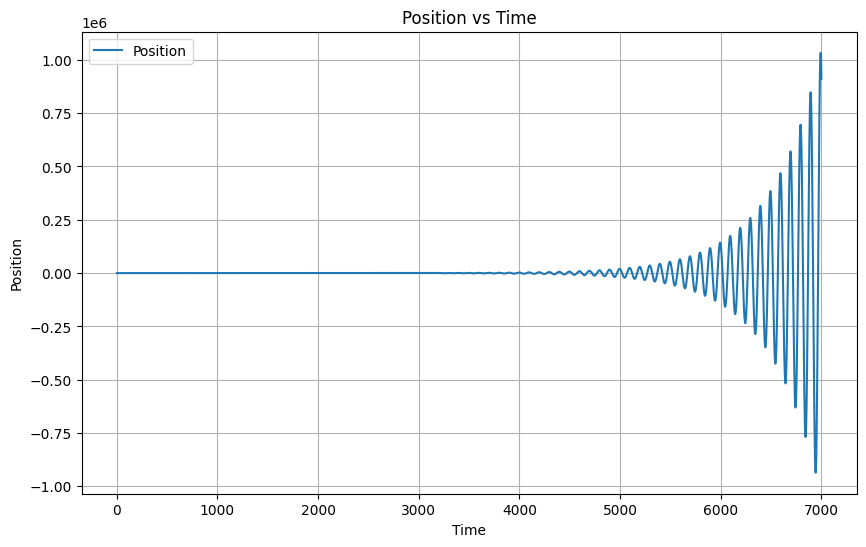

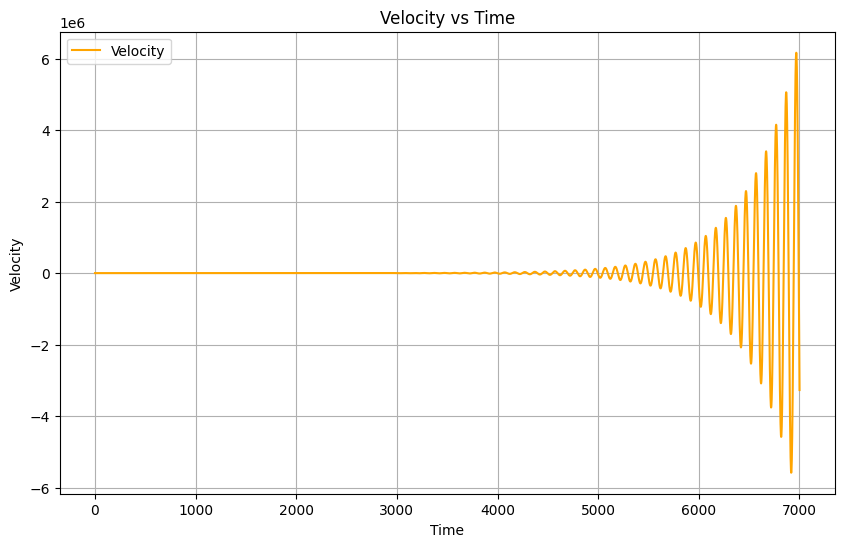

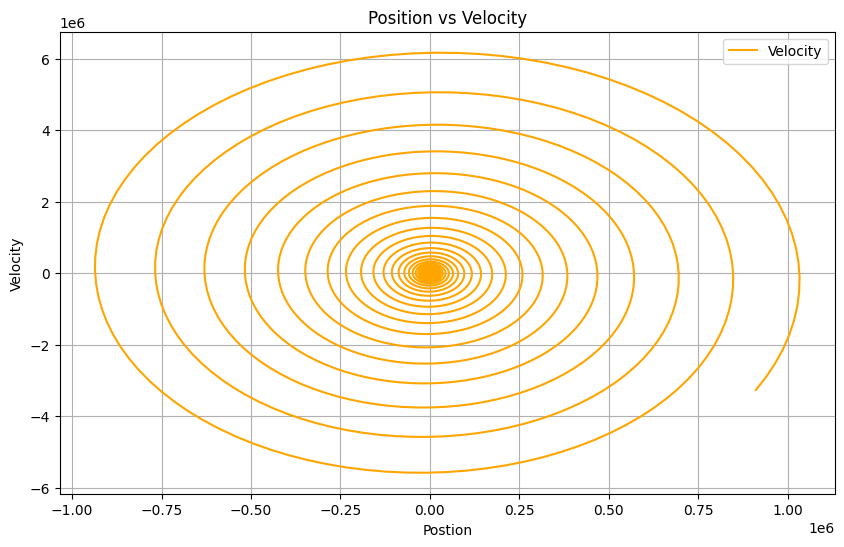

In [7]:
data = np.loadtxt(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\shm_data_damped.dat')
# Extract columns from the data
time= np.arange(1,data.shape[0]+1)
velocity = data[:, 0]
position = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(time, position, label="Position")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time, velocity, label="Velocity", color="orange")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(position, velocity, label="Velocity", color="orange")
plt.xlabel("Postion")
plt.ylabel("Velocity")
plt.title("Position vs Velocity")
plt.legend()
plt.grid(True)
plt.show()


## Pretraining

The `van_der_pol_intermittency.dat` feeds the model with the dynamics of the Van der Pol Oscillator

In [8]:
data1 = np.genfromtxt(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\van_der_pol_intermittency.dat')
training_set1 = pd.DataFrame(data1).reset_index(drop=True)
training_set1 = training_set1.iloc[:,1]

data2 = np.genfromtxt(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\van_der_pol_intermittency.dat')
training_set2 = pd.DataFrame(data2).reset_index(drop=True)
training_set2 = training_set2.iloc[:,1]

data3 = np.genfromtxt(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\shm_data.dat')
training_set3 = pd.DataFrame(data3).reset_index(drop=True)
training_set3 = training_set3.iloc[:,1]

data4 = np.genfromtxt(r'D:\Prisha\SEM 6\Van-der-Pol-informed-Neural-Networks\Dataset\shm_data_damped.dat')
training_set4 = pd.DataFrame(data4).reset_index(drop=True)
training_set4 = training_set4.iloc[:,1]

## Computing the Gradients

_Calculating the value of_ $\frac{dx}{dt}$, _and_ $\frac{d^2x}{dt^2}$

In [9]:
t_diff = 1 # Daily Data
print(training_set1.max())
gradient_t = (training_set1.diff()/t_diff).iloc[1:] # dx/dt
print(gradient_t)
gradient_tt = (gradient_t.diff()/t_diff).iloc[1:] # d2x/dt2
print(gradient_tt)

2.1542379117660277
1       0.000000
2      -0.001665
3      -0.003319
4      -0.004961
5      -0.006593
          ...   
1746   -0.007154
1747   -0.007200
1748   -0.007246
1749   -0.007293
1750   -0.007341
Name: 1, Length: 1750, dtype: float64
2      -0.001665
3      -0.001654
4      -0.001642
5      -0.001632
6      -0.001627
          ...   
1746   -0.000044
1747   -0.000045
1748   -0.000046
1749   -0.000047
1750   -0.000048
Name: 1, Length: 1749, dtype: float64


## Loading Datasets

_दिल्ली WIND SPEED_

In [10]:
data = pd.read_csv("Dataset/delhi.csv")
training_set = data.iloc[:, 3]
training_set

0       0.000000
1       2.980000
2       4.633333
3       1.233333
4       3.700000
          ...   
1457    3.547826
1458    6.000000
1459    6.266667
1460    7.325000
1461    0.000000
Name: wind_speed, Length: 1462, dtype: float64

In [11]:
test = training_set.tail(10)
test
training_set = training_set.head(1452)
training_set

0        0.000000
1        2.980000
2        4.633333
3        1.233333
4        3.700000
          ...    
1447     6.420833
1448    10.414286
1449    15.926667
1450    19.404762
1451     6.180952
Name: wind_speed, Length: 1452, dtype: float64

In [12]:
training_set = training_set.reset_index(drop=True) # sets a list of integer ranging from 0 to length of training_set as index
gradient_t = gradient_t.reset_index(drop=True) # sets a list of integer ranging from 0 to length of gradient_t as index
gradient_tt = gradient_tt.reset_index(drop=True) # sets a list of integer ranging from 0 to length of gradient_tt as index
print(gradient_t)
print(gradient_tt)

0       0.000000
1      -0.001665
2      -0.003319
3      -0.004961
4      -0.006593
          ...   
1745   -0.007154
1746   -0.007200
1747   -0.007246
1748   -0.007293
1749   -0.007341
Name: 1, Length: 1750, dtype: float64
0      -0.001665
1      -0.001654
2      -0.001642
3      -0.001632
4      -0.001627
          ...   
1744   -0.000044
1745   -0.000045
1746   -0.000046
1747   -0.000047
1748   -0.000048
Name: 1, Length: 1749, dtype: float64


In [13]:
df = pd.concat((training_set, gradient_t), axis=1) ##########[:-1]
gradient_tt.columns = ["grad_tt"]
df = pd.concat((df, gradient_tt), axis=1) ################[:-1]
df.columns = ['y_t', 'grad_t', 'grad_tt']

In [14]:
df # DataFrame
df=df.dropna()
df

,y_t,grad_t,grad_tt
0,0.000000,0.000000,-0.001665
1,2.980000,-0.001665,-0.001654
2,4.633333,-0.003319,-0.001642
3,1.233333,-0.004961,-0.001632
4,3.700000,-0.006593,-0.001627
...,...,...,...
1447,6.420833,-0.007354,-0.000049
1448,10.414286,-0.007404,-0.000050
1449,15.926667,-0.007454,-0.000051
1450,19.404762,-0.007505,-0.000053


## Plot of the External Forcing from Chaotic Differential Equation (_Van der Pol Oscillator_)

<Axes: >

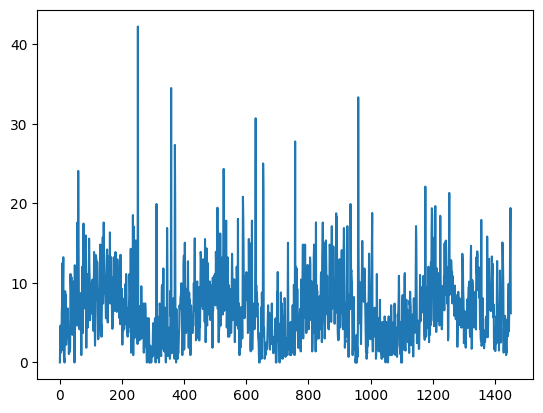

In [15]:
df.iloc[:, 0].plot()

<Axes: >

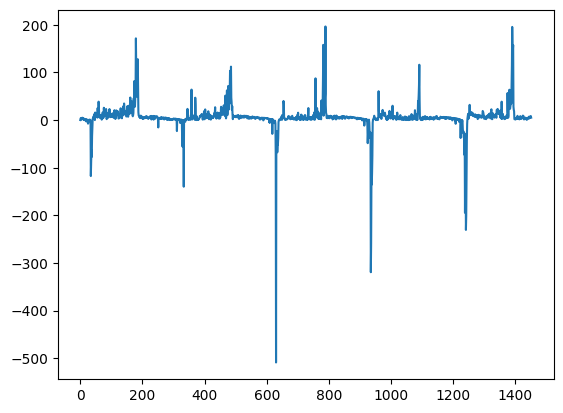

In [16]:
mu = 4
L = df.iloc[:, 2] - mu * (df.iloc[:, 1] - (df.iloc[:, 0]**2 * df.iloc[:, 1]) - (1/mu) * df.iloc[:, 0])
L.plot()

## Preprocessing the data into supervised learning

In [17]:
# split a sequence into samples
def Supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n_in, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n_out)
    for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
       agg.dropna(inplace=True)
    return agg

In [18]:
data = Supervised(df.values, n_in = 35, n_out = 10)
#data.drop(['var2(t-10)', 'var3(t-10)', 'var2(t-9)', 'var3(t-9)', 'var2(t-8)',
#       'var3(t-8)', 'var2(t-7)', 'var3(t-7)', 'var2(t-6)', 'var3(t-6)',
#       'var2(t-5)', 'var3(t-5)', 'var2(t-4)', 'var3(t-4)', 'var2(t-2)',
#       'var3(t-2)', 'var2(t-1)', 'var3(t-1)','var2(t-3)', 'var3(t-3)'], axis = 1, inplace = True)


data.drop(['var2(t-35)', 'var3(t-35)', 'var2(t-34)', 'var3(t-34)', 'var2(t-33)',
       'var3(t-33)', 'var2(t-32)', 'var3(t-32)', 'var2(t-31)', 'var3(t-31)',
    'var2(t-30)', 'var3(t-30)', 'var2(t-29)', 'var3(t-29)', 'var2(t-28)',
       'var3(t-28)', 'var2(t-27)', 'var3(t-27)', 'var2(t-26)', 'var3(t-26)',
       'var2(t-25)', 'var3(t-25)', 'var2(t-24)', 'var3(t-24)', 'var2(t-22)',
       'var3(t-22)', 'var2(t-21)', 'var3(t-21)','var2(t-23)', 'var3(t-23)',
       'var2(t-20)', 'var3(t-20)', 'var2(t-19)', 'var3(t-19)', 'var2(t-18)',
       'var3(t-18)', 'var2(t-17)', 'var3(t-17)', 'var2(t-16)', 'var3(t-16)',
       'var2(t-15)', 'var3(t-15)', 'var2(t-14)', 'var3(t-14)', 'var2(t-12)',
       'var3(t-12)', 'var2(t-13)', 'var3(t-13)', 'var3(t-11)', 'var2(t-11)', 'var3(t-11)',
       'var2(t-10)', 'var3(t-10)', 'var2(t-9)', 'var3(t-9)', 'var2(t-8)',
       'var3(t-8)', 'var2(t-7)', 'var3(t-7)', 'var2(t-6)', 'var3(t-6)',
       'var2(t-5)', 'var3(t-5)', 'var2(t-4)', 'var3(t-4)', 'var2(t-2)',
       'var3(t-2)', 'var2(t-3)', 'var3(t-3)'], axis = 1, inplace = True)

print(data.head())
print(data.columns)

    var1(t-35)  var1(t-34)  var1(t-33)  var1(t-32)  var1(t-31)  var1(t-30)  \
35    0.000000    2.980000    4.633333    1.233333    3.700000    1.480000   
36    2.980000    4.633333    1.233333    3.700000    1.480000    6.300000   
37    4.633333    1.233333    3.700000    1.480000    6.300000    7.142857   
38    1.233333    3.700000    1.480000    6.300000    7.142857   12.500000   
39    3.700000    1.480000    6.300000    7.142857   12.500000    7.400000   

    var1(t-29)  var1(t-28)  var1(t-27)  var1(t-26)  ...  var3(t+6)  var1(t+7)  \
35    6.300000    7.142857   12.500000    7.400000  ...   0.009107   7.416667   
36    7.142857   12.500000    7.400000   10.571429  ...   0.003789   6.085714   
37   12.500000    7.400000   10.571429   13.228571  ...   0.001543   4.333333   
38    7.400000   10.571429   13.228571    4.633333  ...   0.000634  10.183333   
39   10.571429   13.228571    4.633333    0.616667  ...   0.000270   8.485714   

    var2(t+7)  var3(t+7)  var1(t+8)  var2(t+

In [19]:
train = np.array(data[0:len(data)-1])
forecast = np.array(data.tail(1))

In [20]:
trainy = train[:,-30:]
trainX = train[:,:-30]

In [21]:
forecasty = forecast[:,-30:]
forecastX = forecast[:,:-30]

In [22]:
print(forecastX)

[[ 1.27500000e+01  7.07407407e+00  3.22592593e+00  2.96800000e+00
   2.78461538e+00  4.40000000e+00  1.49615385e+00  4.08800000e+00
   7.13846154e+00  1.15500000e+01  7.78000000e+00  2.84000000e+00
   2.50500000e+00  2.71538462e+00  8.00000000e+00  6.60434783e+00
   8.28947368e+00  1.50850000e+01  1.44941176e+01  1.24590909e+01
   9.18571429e+00  1.23888889e+00  4.26956522e+00  2.70416667e+00
   4.94583333e+00  5.86666667e+00  5.66666667e+00  4.95238095e+00
   2.50384615e+00  9.25000000e-01  1.76500000e+00  1.31250000e+00
   5.35555556e+00  4.71666667e+00  3.28181818e+00 -7.07834484e-03
  -4.37524523e-05]]


In [23]:
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
forecastX = forecastX.reshape((forecastX.shape[0], 1, forecastX.shape[1]))
print(trainX.shape, trainy.shape, forecastX.shape)

(1407, 1, 37) (1407, 30) (1, 1, 37)


### vanderpol

In [24]:
mu = tf.Variable(4, name="mu", trainable=True, dtype=tf.float32)
splitr = 0.8

def loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true[:, 0] - y_pred[:, 0])
    #squared_difference2 = tf.square(y_true[:, 2]-y_pred[:, 2])
    #squared_difference1 = tf.square(y_true[:, 1]-y_pred[:, 1])
    squared_difference3 = tf.square(
        y_pred[:, 2] - mu * (y_pred[:, 1] - (y_pred[:, 0]**2 * y_pred[:, 1]) - (1/mu) * y_pred[:, 0]))
    return tf.reduce_mean(squared_difference, axis=-1) + 0.2*tf.reduce_mean(squared_difference3, axis=-1)

model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(30))
model.compile(loss=loss_fn, optimizer='adam')
history = model.fit(trainX[:int(splitr*trainX.shape[0])], trainy[:int(splitr*trainX.shape[0])], epochs=100, batch_size=64, validation_data=(trainX[int(splitr*trainX.shape[0]):trainX.shape[0]], trainy[int(splitr*trainX.shape[0]):trainX.shape[0]]), shuffle=False)



Epoch 1/100

18/18 [==============================] - 6s 68ms/step - loss: 57.0423 - val_loss: 47.9213
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 41.5254 - val_loss: 38.5869
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 36.3128 - val_loss: 33.2257
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 32.6402 - val_loss: 30.2199
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 30.1853 - val_loss: 27.0816
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 27.9611 - val_loss: 24.6321
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 26.1231 - val_loss: 22.3780
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 24.6755 - val_loss: 20.9531
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 23.8402 - val_loss: 20.4254
Epoch 10/100
18/18 [==============================] - 0s 9ms/step - loss: 23.8996 -

### shm

In [25]:
mu = tf.Variable(4, name="mu", trainable=True, dtype=tf.float32)
splitr = 0.8
mass = 1.0  # kg
spring_constant = 4.0  # N/m
omega = np.sqrt(spring_constant / mass) 

def loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true[:, 0] - y_pred[:, 0])
    #squared_difference2 = tf.square(y_true[:, 2]-y_pred[:, 2])
    #squared_difference1 = tf.square(y_true[:, 1]-y_pred[:, 1])
    squared_difference3 = tf.square(
        y_pred[:, 2] +  (omega**2)*y_pred[:, 0])
    return tf.reduce_mean(squared_difference, axis=-1) + 0.2*tf.reduce_mean(squared_difference3, axis=-1)
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(30))
model.compile(loss=loss_fn, optimizer='adam')
history = model.fit(trainX[:int(splitr*trainX.shape[0])], trainy[:int(splitr*trainX.shape[0])], epochs=135, batch_size=64, validation_data=(trainX[int(splitr*trainX.shape[0]):trainX.shape[0]], trainy[int(splitr*trainX.shape[0]):trainX.shape[0]]), shuffle=False)

Epoch 1/135
18/18 [==============================] - 4s 48ms/step - loss: 57.4976 - val_loss: 56.6869
Epoch 2/135
18/18 [==============================] - 0s 9ms/step - loss: 51.6524 - val_loss: 53.2688
Epoch 3/135
18/18 [==============================] - 0s 10ms/step - loss: 49.2552 - val_loss: 51.2550
Epoch 4/135
18/18 [==============================] - 0s 9ms/step - loss: 47.3185 - val_loss: 48.7669
Epoch 5/135
18/18 [==============================] - 0s 9ms/step - loss: 45.2416 - val_loss: 46.5265
Epoch 6/135
18/18 [==============================] - 0s 12ms/step - loss: 43.2706 - val_loss: 44.3238
Epoch 7/135
18/18 [==============================] - 0s 8ms/step - loss: 41.3830 - val_loss: 42.2197
Epoch 8/135
18/18 [==============================] - 0s 10ms/step - loss: 39.6660 - val_loss: 40.4497
Epoch 9/135
18/18 [==============================] - 0s 11ms/step - loss: 38.0761 - val_loss: 38.3659
Epoch 10/135
18/18 [==============================] - 0s 9ms/step - loss: 36.3315 - va

In [26]:
forecast_without_mc = forecastX
yhat_without_mc = model.predict(forecast_without_mc) # Step Ahead Prediction
forecast_without_mc = forecast_without_mc.reshape((forecast_without_mc.shape[0], forecast_without_mc.shape[2])) # Historical Input

1/1 [==============================] - 1s 996ms/step


In [27]:
print(yhat_without_mc)

[[ 2.18314171e+00  4.00397122e-01 -1.21754055e+01  1.17740417e+00
  -9.77227271e-01 -6.44941270e-01 -3.27451676e-01 -2.67675370e-01
  -3.88657957e-01 -4.35705274e-01 -2.99768732e-03 -4.16367561e-01
  -6.08116031e-01 -3.08967799e-01  3.58394504e-01 -1.06507897e-01
   2.45718639e-02 -5.10945976e-01  1.16487730e+00 -2.45643869e-01
   6.64517820e-01 -2.65848398e-01 -1.86902976e+00 -1.04590309e+00
   1.09848511e+00 -6.94277108e-01  1.80320695e-01  4.63046253e-01
  -1.20563731e-02 -6.58922493e-02]]


In [43]:
final_forecast = yhat_without_mc[:,0:29:3]
final_forecast[final_forecast<0] = 0
print(final_forecast)
print(final_forecast.shape)


[[2.1831417  1.1774042  0.         0.         0.         0.
  1.1648773  0.         1.0984851  0.46304625]]
(1, 10)


In [44]:
true_forecast = forecasty[:,0:29:3]
print(true_forecast)
print(true_forecast.shape)

[[ 3.43        8.02777778  9.87916667  3.91666667  6.73157895  6.42083333
  10.41428571 15.92666667 19.4047619   6.18095238]]
(1, 10)


In [45]:
from plot import plot_forecasts


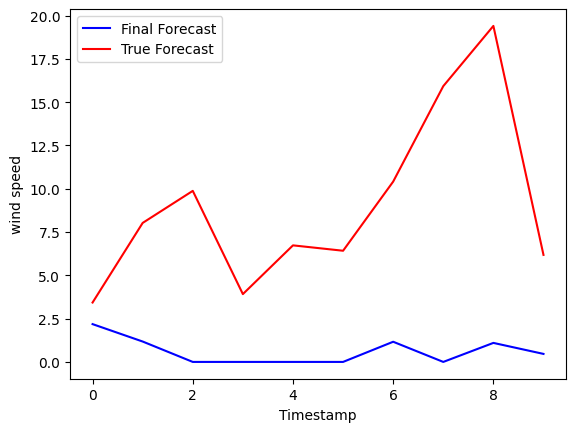

In [46]:
ylabel = "wind speed"
plot_forecasts(final_forecast, true_forecast,ylabel)


In [30]:
print(sqrt(mean_squared_error(final_forecast,true_forecast)))

9.772339686897839
